<a href="https://colab.research.google.com/github/sidneyferrari/Portifolio/blob/main/Customer_Churn_EDA/Projeto_Churn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO CHURN - EDA

# **1 - DEFININDO O PROBLEMA**

**Problema:**

Qual o perfil dos clientes que deixaram de utilizar os serviços da empresa?

O quanto a empresa deixa de faturar por este motivo?

**Objetivos:**

Conhecer o perfil dos clientes da Telco que deixarm de utilizar os serviços da empresa.

Identificar quantoa Telco reduz a sua receita mensalmente e anualmente com a rotatividade dos usuários.

# **2 - PREPARANDO OS DADOS**

# **2.1 - Descrição dos dados**

> *Dados que estão disponíveis:*

Neste projeto foi utilizado o conjunto de dados da empresa de telecomunicações "Telco", que está disponível no Kaggle com o título "Telco Costumer Churn".

Disponível em: https://www.kaggle.com/dataset/blastchar/telco-customer-churn

*Importante*: O dataset original "WA_Fn-UseC_-Telco-Customer-Churn.csv" foi salvo em CSV nomeado como **Dados_Telco.csv**

*Nota*: salvar CSV como - CSV UTF-8 (comma delimited)(.csv)

O Dataset "Dados_Telco.csv" contém 7043 linhas onde cada linha representa um cliente e 21 colunas que contém os atributos do cliente.

A coluna "Churn" é o nosso target (alvo) e representa os clientes que saíram no último mês.



>*Dicionário de variáveis:*

| **Atributo**     | **Descricao**                                                                                                     | **Dominios**                                              | **Tipo de campo** |
|------------------|-------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------|-------------------|
| customerID       | Customer ID                                                                                                       | Ex: 7590-VHVEG                                            | Texto             |
| Gender           | Whether the customer is a male ou a female                                                                        | Male. Female                                              | Texto             |
| SeniorCitizen    | Whether the customer is a senior citizen ou not (1, 0)                                                            | 1 senior, 0 no                                            | Binario           |
| Partner          | Whether the customer has a partner ou not (Yes, No)                                                               | Yes, No                                                   | Texto             |
| Dependents       | Whether the customer has dependents or not (Yes, No)                                                              | Yes, No                                                   | Texto             |
| Tenure           | Number of months the customer has stayed with the company                                                         | 1, 34, 2, 45, ...                                         | Inteiro           |
| PhoneService     | Whether the customer has a phone service or not (Yes, No)                                                         | Yes, No                                                   | Texto             |
| MultipleLines    | Whether customer has multiple lines or not (Yes, No, No phone service)                                            | Yes, No, No phone service                                 | Texto             |
| InternetService  | Customer's internet service provide (DSL, Fiber optic, No)                                                        | DSL, Fiber optic, No                                      | Texto             |
| OnlineSecurity   | Whwther the customer has online security or not (Yes, No, No intenet service)                                     | Yes, No, No internet service                              | Textp             |
| OnlineBackup     | Whether the customer has online backup or not (Yes, No, No internet service)                                      | Yes, No, No internet service                              | Texto             |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service)                                  | Yes, No, No internet service                              | Texto             |
| TechSupport      | Whether the customer has tech support ou not (Yes, No, No internet service)                                       | Yes, No, No internet service                              | Texto             |
| StreamingTV      | Whether the customer has streaming TV or not (Yes, No, No internet service)                                       | Yes, No, No internet service                              | Texto             |
| StreamingMovies  | Whether the customer has streaming movies or not (Yes, No, No internet service)                                   | Yes, No, No internet service                              | Texto             |
| Contract         | The contract term of the customer (Month-to-month, One year, Two year)                                            | Month-to-month, One year, Two year                        | Texto             |
| PaperlessBilling | Whether the customer has paperless billing ou not (Yes, No)                                                       | Yes, No                                                   | Texto             |
| PaymentMethod    | The customer's payment method (Eletronic check, Malled check, Bank transfer (automatic), Credit card (automatic)) | Eletronic check, Malled check, Bank transfer, Credit card | Texto             |
| MonthlyCharges   | The amount charged to the customer monthly                                                                        | Ex: 29.95; 53.85                                          | Float             |
| TotalCharges     | The total amount charged to the customer                                                                          | Ex: 1889,5; 108,15                                        | Object (texto)    |
| Churn            | Whether the customer churned ou not (Yes or No)                                                                   | Yes, No                                                   | Texto             |




# **2.2 - Processando os dados**


> Lendo os dados disponíveis

dados.csv: dataset que será utilizado como arquivo de trabalho


In [1]:
import pandas as pd
dados = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Projeto Churn - EDA/Dados_Telco.csv", sep=",")
dados

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


>*Analisando o tipo dos dados*

In [2]:
# Tipo de dados de cada atributo.
dados.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [3]:
# Tipo de dados dos atributos e existência de atributos ausentes.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **2.3 - Sumarizando os dados - Visualizando dos dados**

A finalizdade desta visualização é fazer o cruzamento do atributo "Churn" com os demais atributos do dataset para extrair informações de quais atributos exercem maior influência na decisão do cliente abandonar a Telco.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


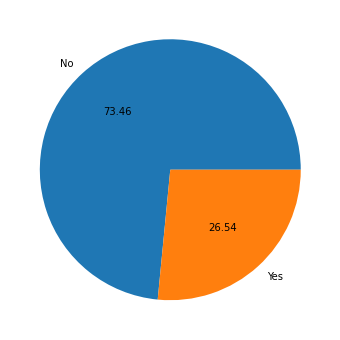

[No     5174
 Yes    1869
 Name: Churn, dtype: int64]

In [4]:
# Encntrando a taxa de rotatividade da Telco
import matplotlib.pyplot as plt
Churn = ['No', 'Yes']
frequencia = [dados['Churn'].value_counts().sort_index()]
fig = plt.figure(figsize=(6, 6))
plt.pie(frequencia, labels=Churn, autopct='%.2f')
plt.show()
frequencia

Análise:

Os clientes que abandonaram a Telco no último mês perfazem 26,54%, sendo esta a taxa de rotatividade dos clientes da empresa.

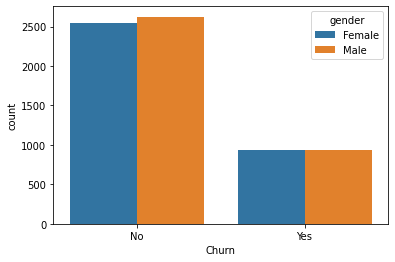

In [5]:
# Analisando o atributo "Churn" com o atributo "Gender".
import seaborn as sns
sns.countplot(x='Churn', hue='gender', data=dados)

Análise:

Percebe-se que não há predominância de sexo nos clientes que abandonam a Telco. A quantidade de abandonos no sexo masculino é a mesma que no sexo feminino.

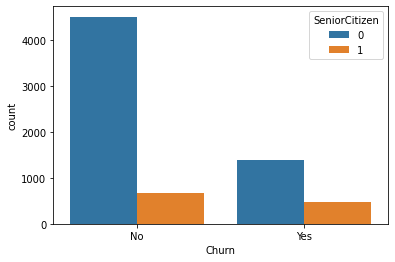

In [6]:
# Analisando o atributo "Churn" com o atributo "SeniorCitizen".
sns.countplot(x='Churn', hue='SeniorCitizen', data=dados)

Análise:

Há uma maior incidência de não idosos (valor 0) nos clientes que abandonaram a Telco. Portanto, o atributo "SeniorCitizen" (idoso) não contribui para o cliente abandonar a empresa.

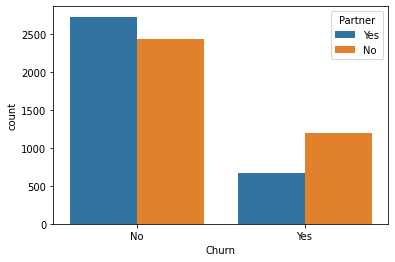

In [7]:
# Analisando o atributo "Churn" com o atributo "Partner".
sns.countplot(x='Churn', hue='Partner', data=dados)

Análise:

Considerando-se a união conjugal, nota-se que predominam os não casados (partner) entre os clientes que deixaram de utilizar os serviços da Telco.

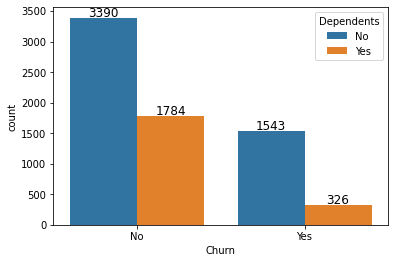

In [8]:
# Analisando o atributo "Churn" com o atributo "Dependents".
plot = sns.countplot(x='Churn', hue='Dependents', data=dados)

for i in plot.patches:                                              #
  plot.annotate(i.get_height(),                                     #  
                (i.get_x() + i.get_width() / 2, i.get_height()),    #  Para colocar os rótulos nas barras
                ha='center', va='baseline', fontsize=12,            #
                color='black', xytext=(0, 1),                       #
                textcoords='offset points') 

Análise:

Nota-se que a maioria dos clientes que abandonam a Telco não possuem dependentes.

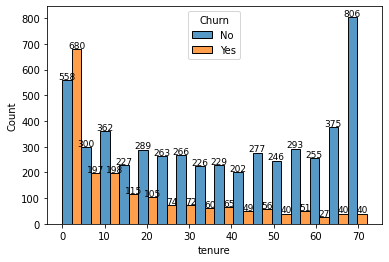

In [9]:
# Analisando o atributo "Churn"com o atributo "tenure"
plot = sns.histplot(x = 'tenure', hue = 'Churn', data = dados, multiple='dodge')    # Construção do gráfico.

for i in plot.patches:                                              #
  plot.annotate(i.get_height(),                                     #  
                (i.get_x() + i.get_width() / 2, i.get_height()),    #  Para colocar os rótulos nas barras
                ha='center', va='baseline', fontsize=9,             #
                color='black', xytext=(0, 1),                       #
                textcoords='offset points')                         #

Análise:

Uma grande quantidade de clientes (em torno de 680) abandonam a Telco nos primeiros 5 meses de ter utilizado os serviços da empresa. Talvez seja esse o tempo de experiência em que o cliente testa os serviços contratados. O atributo "tenure" é medido em meses.

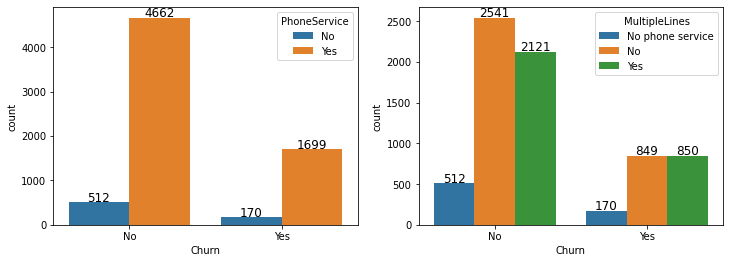

In [10]:
# Analisando o atributo "Churn" com os aributos "PhoneService" e "MultipleLines".
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

plot = sns.countplot(x='Churn', hue = 'PhoneService',data=dados, ax=axes[0])    # Construção do gráfico.
for i in plot.patches:                                              #
  plot.annotate(i.get_height(),                                     #  
                (i.get_x() + i.get_width() / 2, i.get_height()),    #  Para colocar os rótulos nas barras
                ha='center', va='baseline', fontsize=12,            #
                color='black', xytext=(0, 1),                       #
                textcoords='offset points') 

plot = sns.countplot(x='Churn', hue = 'MultipleLines', data=dados, ax=axes[1])  # Construção do gráfico.
for i in plot.patches:                                              #
  plot.annotate(i.get_height(),                                     #  
                (i.get_x() + i.get_width() / 2, i.get_height()),    #  Para colocar os rótulos nas barras
                ha='center', va='baseline', fontsize=12,            #
                color='black', xytext=(0, 1),                       #
                textcoords='offset points') 

Análise:

O primeiro gráfico mostra que a maioria dos clientes que abandonam a Telco possuem serviços telefônicos.

O gráfico da direita indica que possuir múltiplas linhas telefônicas não interfere na atitude de abandono da empresa. 

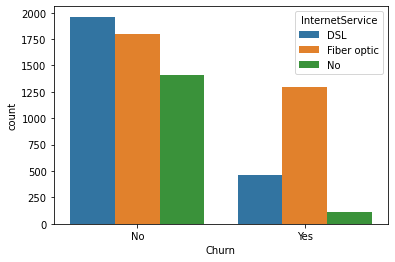

In [11]:
# Analisando o atributo "Churn" com o atributo "InternetService".
sns.countplot(x='Churn', hue='InternetService', data=dados)

Análise:

A maioria dos clientes que abandonam a Telco possuem serviços de internet de fibra optica.

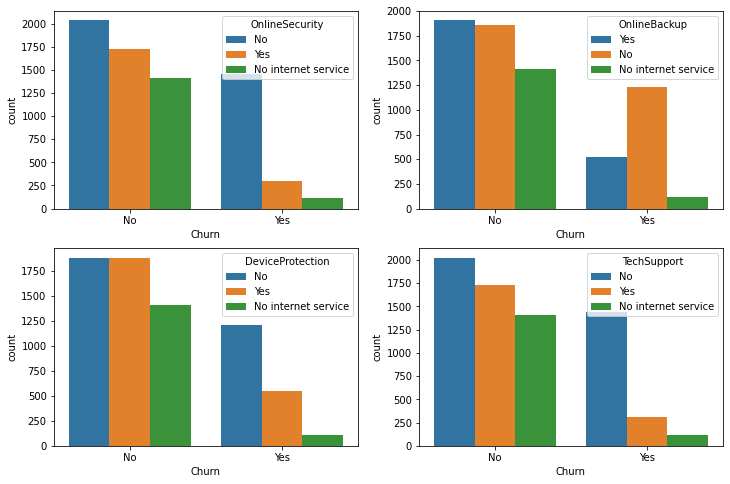

In [12]:
# Analisando o atributo "Churn" com os atributos "OnlieSecurity", "OnlineBackup", "DeviceProtection" e "TechSupport".
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()    # Achatar a matriz a matriz de eixos para indexar 
sns.countplot(x='Churn', hue = 'OnlineSecurity',data=dados, ax=axes[0])
sns.countplot(x='Churn', hue = 'OnlineBackup', data=dados, ax=axes[1])
sns.countplot(x='Churn', hue = 'DeviceProtection', data=dados, ax=axes[2])
sns.countplot(x='Churn', hue = 'TechSupport', data=dados, ax=axes[3])

Análise:

Observando os gráficos percebe-se que os clientes que abandonam a Telco a maioria não possuem serviços de backup online; em menor quantidade possuem serviços de segurança online, dispositivos de proteção e suporte técnico.

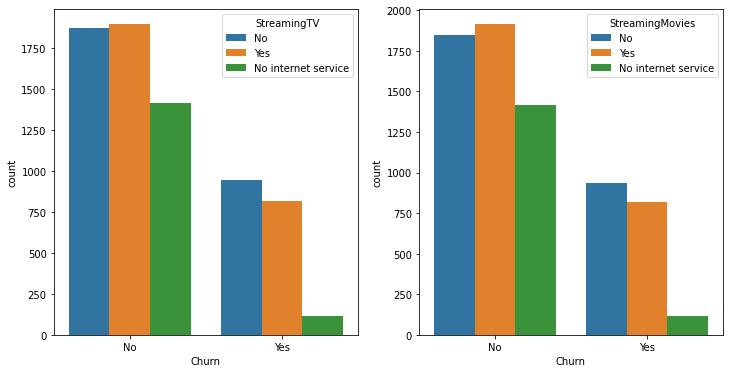

In [13]:
# Analisando o atributo "Churn" com os atributos "StreamingTV" e "StreamingMovies".
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes = axes.flatten()
sns.countplot(x='Churn', hue = 'StreamingTV',data=dados, ax=axes[0])
sns.countplot(x='Churn', hue = 'StreamingMovies', data=dados, ax=axes[1])

Análise:

Observa-se nos gráficos que a quantidade dos clientes que abandonam a Telco e não possuem serviço de streaming de TV e de Filmes é maior do que aqueles que possuem esses serviços.

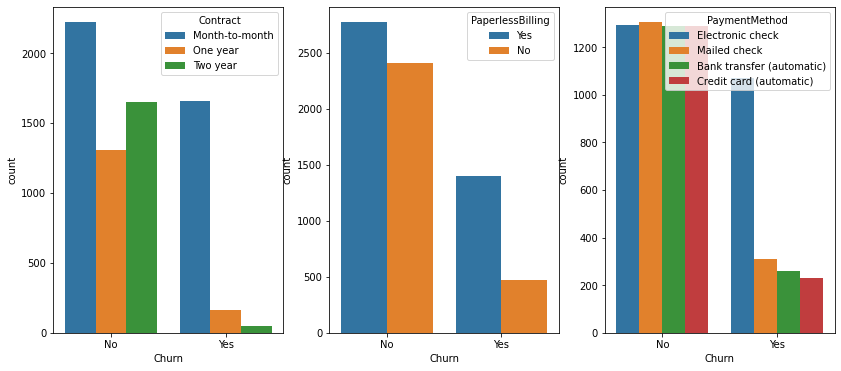

In [14]:
# Analisando o atributo "Churn" com os atributos "Contract", "PapaerlessBilling" e "PaymentMethod".
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
axes = axes.flatten()  # achatar a matriz a matriz de eixos para indexar
sns.countplot(x='Churn', hue = 'Contract',data=dados, ax=axes[0])
sns.countplot(x='Churn', hue = 'PaperlessBilling', data=dados, ax=axes[1])
sns.countplot(x='Churn', hue = 'PaymentMethod', data=dados, ax=axes[2])

Análise:

Em relação ao tipo de contrato e as respectivas formas de pagamento pelos serviços prestados nota-se que o prazo do contrato dos clientes que abandonam a Telco é do tipo mês a mês. Pouquíssemos deles possuem um prazo de contrato de duração de um ou dois anos. Uma grande quantidade dos clientes que abandonam realizam o pagamento da forma "sem papel" (paperless billing), utilizando o método eletrônico.

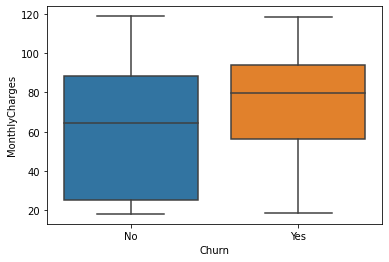

In [15]:
# Avaliando o atributo "Churn" com o atributo "MonthlyCharges".
sns.boxplot(x='Churn', y='MonthlyCharges', data=dados)

Análise:

Percebe-se que os clientes que abandonam a Telco pagam mensalmente pelos serviços contratados um valor mediano próximo de $80.00, sendo que 25% dos clientes que abandonam pagam mensalmente até 60.00 dólares e 25% dos que abandonam a empresa pagam 90.00 dólares ou mais.

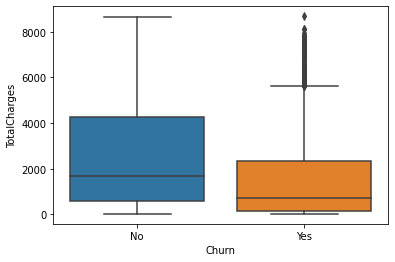

In [16]:
# Avaliando o atributo "Churn" com o atributo "TotalCharges".
# Transformando o atributo "TotalCharges" (object) em atributo numérico.
  # Utilizando a transformação com a função "astype()" não deu certo. Deve haver neste atributo algum valor
  # do tipo "-" que é considerado como string não trnasformável em número. Por isso foi usado "erros=coerce"
  # no sentido de coagir, reprimir.
dados['TotalCharges'] = pd.to_numeric(dados['TotalCharges'], errors='coerce')

# Construindo o gráfico "boxplot".
sns.boxplot(x='Churn', y='TotalCharges', data=dados)

Análise:

Observa-se que o valor total cobrado dos clientes que abandonam a Telco tem um valor mediano de aproximadamente $500.00.

# **2.4 - Sumarizando os dados - Análise descritiva**

A estatística descritiva fornece informações sobre os dados (estatística descreitiva => informações). A inferência estatística fornece conhecimento sobre os dados (inferência => conhecimento).

In [17]:
# Quantidade de clientes que deixaram (churn ou rotatividade) a Telco.
# Calculando a distribuição de frequência do atributo "Churn"
dados['Churn'].value_counts().sort_index()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [18]:
# Calculando a distribuição de frequência do atributo "Churn"em porcentagem.
dados['Churn'].value_counts().sort_index()*100/sum(dados["Churn"].value_counts().sort_index())

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Análise:

Pelas informações acima, pode-se concluir que 26,54% dos clientes da Telco abandonam a empresa.

Conclusão: a taxa de rotatividade dos clientes da Telco é de 26,54%.

In [19]:
# Calculando as estatísticas descritivas dos atributos "MonthlyCharges" e "TotalCharges".
# Estas estatístias correspondem tanto aos clientes que abandonaram como aqueles que não abandonaram a Telco.
dados[['MonthlyCharges', 'TotalCharges']].describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7032.000000
mean,64.761692,2283.300441
std,30.090047,2266.771362
min,18.250000,18.800000
25%,35.500000,401.450000
50%,70.350000,1397.475000
75%,89.850000,3794.737500
max,118.750000,8684.800000


Análise:

Considerendo todos os clientes da Telco tanto os que abandonaram como aqueles que não abandonaram a empresa, realizavam pagamentos mensais em média de 64,76 dólares. Estes mesmos clientes contribuiam, durante todo o período que ficavam na empres, com o valor médio de 2.283,30 dólares.

Estes mesmos clientes 25% deles pagavam para a Telco até 35,50 dólares por mês e, 25% deles pagavam para a Telco um valor de pelo menos 89,85 dólares mensais.

In [20]:
# Agrupando o atributo "Churn" e calculando as estatíticas descritivas do atributo "MonthlyCharges" e do
# atributo "TotalCharges"no grupo.
dados.groupby('Churn')['MonthlyCharges', 'TotalCharges'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


MonthlyCharges                                                    \
               count       mean        std    min    25%     50%   75%   
Churn                                                                    
No            5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4   
Yes           1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2   

              TotalCharges                                                     \
          max        count         mean          std    min      25%      50%   
Churn                                                                           
No     118.75       5163.0  2555.344141  2329.456984  18.80  577.825  1683.60   
Yes    118.35       1869.0  1531.796094  1890.822994  18.85  134.500   703.55   

                          
            75%      max  
Churn                     
No     4264.125  8672.45  
Yes    2331.300  8684.80

Análise:

Estas estatísticas descritivas, agora agrupadas pelos clientes que abandonaram ou não a empresa, confirmam as análises realizadas por meio do gráfico boxplot. Nota-se, ainda, que cada um que abandonou a empresa pagava mensalmente o valor médio de 74,44 dólares e tinha um pagamento médio total de 1.531,79, durante a sua permanência na empresa.

Observação: se um cliente traz 1.531,79 dólares, durante a sua vida na empresa, a Telco não deve gastar mais que 1.531,79 dóleres para retê-lo.

In [21]:
# Agrupando o atributo "Churn" e calculando as estatíticas descritivas do atributo "tenure" no grupo.
dados.groupby('Churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


Análise:

Em média os clientes da Telco abandonam a empresa com 17,9 meses de contrato. O atributo "tenure"
 é medido em meses. 

Cada um desses clientes paga um valor médio de 74,44 dólares por mês (cálculo anterior) então, a empresa deixa de arrecadar um valor médio mensal de (17,9)x(74,44) perfazendo um total de 1.332,48 dólares, durante a sua permanência na empresa.

In [22]:
# Calculando a média do atributo "tenure" em cada plano de contrato.
# O atributo "tenure" é medido em meses.
dados.groupby(['Churn', 'Contract'])['tenure'].agg(['mean'])

mean
Churn Contract                 
No    Month-to-month  21.033333
      One year        41.674063
      Two year        56.602914
Yes   Month-to-month  14.016918
      One year        44.963855
      Two year        61.270833

Análise:

O tempo de permanência em cada plano, dos clientes que abandonam a empresa, medido em meses pelo atributo "tenure" é de 14,02 meses para o plano mês a mês, 44,96 meses para o plano de um ano e 61,27 meses para o plano de dois anos. Nota-se que o plano mês a mês tem o menor tempo de pernamência na empresa, indicando possivlmente uma insatisfação desses clientes, motivando a sua desistência e que precisa ser averiguada pela Telco.

In [23]:
# Calculando quantos clientes deixaram a empresa em cada plano de serviços contratados
# Calculando a taxa de rotatividade de clientes em cada plano
dados.groupby('Churn')['Contract'].value_counts().sort_index()

Churn  Contract      
No     Month-to-month    2220
       One year          1307
       Two year          1647
Yes    Month-to-month    1655
       One year           166
       Two year            48
Name: Contract, dtype: int64

Análise:

Observa-se que a quantidade de clientes que abandonam a Telco é superior no plano de pagamento mês a mês (1655 clientes) do que nos demais planos. Seria interessante que a empresa revisasse os serviços oferecidos neste plano e que, possivelmente, não está agradando o seu público.

Taxa de rotatividade de cada plano:

No plano mês a mês a taxa de rotatidivade (TR) é igual a: TR = 1655 / (2220+1655) = 0,42,71 = 42,71%.
No plano de um ano, temos: TR = 166 / (166+1307) = 11,27%.
No plano de dois anos, temos: TR = 48 / (48+1647) = 2,83%.

Nota-se que o plano mês a mês tem a maior taxa de abandono de clientes.

In [24]:
# Agrupando o atributo "Churn" e calculando o valor médio mensal dos planos,
# contando a quantidade de clientes e a soma dos valores pagaos em cada plano,
# dos que abandonam e não abandonam. 
dados.groupby(['Churn', 'Contract'])['MonthlyCharges'].agg(['count','mean','sum'])

count       mean        sum
Churn Contract                                   
No    Month-to-month   2220  61.462635  136447.05
      One year         1307  62.508148   81698.15
      Two year         1647  60.012477   98840.55
Yes   Month-to-month   1655  73.019396  120847.10
      One year          166  85.050904   14118.45
      Two year           48  86.777083    4165.30


Análise:

O valor médio do plano de pagamento mês a mês, dos clientes que abandonam a Telco, é de 73,02 dólares. Nota-se que este valor é maior do que o valor médio (61,46 dólares) dos clientes que não abandonam a Telco, considerando o mesmo plano de pagamento. Talvez esse possa ser o motivo que leva o cliente abandonar a empresa. Seria interessante a empresa observar o valor desse tipo de plano de pagamento dos seus concorrentes. 

A Receita recorrente mensal (MRR) é obtida observando-se o quanto a empresa deixou de arrecadar, no último mês. No plano mês a mês essa quantia é de MRR = 120.847,10 dólares. O MRR em porcentagem é de MRR(%) = 120,847,10/(120.847,10 + 136.447,05) = 0,4697 = 46,97%. No plano de um ano, temos MRR = 14.118,45 que em porcentagem é igual a MRR(%) = 14.118,45/(14.118,45 + 81.698,15)= 14,73%. No plano de dois anos, temos MRR = 4.165,30. Em porcentagem é igual a: MRR(%) = 4.165,30/(4.165,30 + 98.840,55) = 4,04%.

Nota-se que o plano mês a mês tem um impacto financeiro maior que os demais planos porque possui um MRR mais elevado.

# **3 - PERFIL DO CLIENTE QUE ABANDONA (CHURN)**

O atributo "Churn" no conjunto de dados utilizado neste projeto indica se o cliente da Telco abandonou ou não a empresa no último mês.

Considerando aqueles clientes que abandonaram a empresa no último mês destacamos as seguintes características que compõe o seu perfil, considerando os aspectos demográficos, as informações da conta do cliente e os serviços para os quais cada cliente se inscreveu.

Essas características que compõe o perfil dos clientes que abandonaram a empresa foram obtidas das análises realizadas nos tópicos anteriores.

**Abandono (Churn):** entre os clientes da Telco 26,54% deles abandonaram a empresa no último mês, sendo esta a taxa de rotatividade.

**Aspectos demográficos:** quanto ao ***gênero sexual*** percebe-se que não há interferência desse aspecto no abandono.A quantidade de abandonos no sexo masculino é a mesma que no sexo feminino. Há uma maior incidência de ***não idosos*** nos clientes que abandonaram a Telco. Portanto, ser idoso não contribui para o cliente abandonar a empresa. Quanto a ***união conjugal***, nota-se que predominam os não casados entre os clientes que deixaram de utilizar os serviços da Telco. A maioria dos clientes que abandonam a empresa não possuem ***dependentes.***

**Informações da conta do cliente:** os clientes da Telco tem um tempo médio de ***permanência na empresa*** que varia de acordo com o plano contratado. No plano mês a mês esse tempo é de 14,02 meses; no plano de um ano é de 44,96 meses e no pano de dois anos é de 61,27 meses até abandonar. Nos 5 primeiros meses deste período ocorrem um maior número de abandonos (em torno de 680 abandonos) e este período pode ser considerado como o tempo de experiência do cliente com a empresa, onde os seus seviços contratados são testados. O tipo de ***contrato*** da maioria dos clientes que abandonam a empresa é mensal e realizam os pagamentos por via eletrônica. Nota-se, ainda, que cada um que abandonou a empresa pagava um ***valor médio mensal***  que também varia de acordo com o plano contratado, sendo de 73,02 dólares para o plano mês a mês. 

**Serviços contratados pelos clientes:** A maioria dos clientes (1699 clientes) que abandonam a Telco possuem ***serviços telefônicos*** e que possuir múltiplas linhas telefônicas não interfere na atitude de abandono da empresa. Grande parte dos clientes que abandonam a Telco possuem ***serviços de internet*** de fibra optica. Outras características dos serviços contratados é que os clientes que abandonam a Telco a maioria não possuem ***serviços de backup online***; em menor quantidade possuem s***erviços de segurança online***, ***dispositivos de proteção*** e ***suporte técnico***. Os clientes que abandonam a Telco, a maioria, não possuem ***serviço de streaming de TV e de Filme***.


**Resumindo:** considerando somente os que abandonaram a empresa no último mês.

**26,54%** abandonaramm no último mês.

**Gênero sexual** não interfere no abandono.

**Não idosos** é a maioria.

**Não casados** predomina nos abandonos.

**Dependentes** a maioria não possui.

**14,02 meses** é o tempo médio de permanência dos que abandonam a empresa com contrato mês a mÊs.

**5 primeiros meses** é o tempo de experiência com a empresa.

**Contrato mensal** é o tipo de contrato que predomina dos que abandonam.

**Via eletrônica** é o tipo de pagamento que predomina no abandono.

**73,02 dólares** é o pagamento médio mensal dos que abandonam com contrato mês a mês.

# 4 - **RECOMENDAÇÕES**

Observando o perfil dos clientes que abandonam a Telco as segintes hipóteses, que levam os clientes evadirem, podem ser consideradas:
*   O tipo de serviço oferecido pela Telco não corresponde às expectativas dos clientes jovens (não idosos), solteiros (não casados) de ambos os sexos.
*   Os produtos oferecidos pela empresa podem não ser de boa qualidade devido ao pouco tempo de permanência como cliente até abandonar (14,02 meses).
*   Pode haver concorrentes no mercado oferecendo melhores preços (menos que 73,02 dólares mensais).

Mediante estas hipóteses as seguites recomendações para evitar a rotatividade dos clientes, são sugeridas:
*   Oferecer serviços que gere mais satisfação para o público jovem e solteiros de ambos os sexos.
*   Melhorar a qualidade dos serviços oferecidos, aumentando o tempo de permanência dos clientes.
*   Rever a política de preços da empresa.

Deve ser considerado que cada cliente que deixa a Telco, a empresa deixa de faturar 120.847,10 dólares (tabela 2), somente no plano mês a mês, produzaindo um impacto negativo no seu faturamento. Por este motivo, a Telco não deve gastar mais que 120.847,10 dóleres para retê-lo.